In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
import itertools


In [29]:
names = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','num_posts','has_duplicate','onlyHasURL','has_retweet','contains_hashTag','predict']
data_public = pd.read_csv("Patrick_Shyu/public.csv",names = names)
names1 = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','predict']
data_private = pd.read_csv("Patrick_Shyu/private.csv", names = names1)

In [19]:
names = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','num_posts','has_duplicate','onlyHasURL','has_retweet','contains_hashTag','predict']
data_public = pd.read_csv("livingbobby/public.csv",names = names)
names1 = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','predict']
data_private = pd.read_csv("livingbobby/private.csv", names = names1)

In [20]:
names = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','num_posts','has_duplicate','onlyHasURL','has_retweet','contains_hashTag','predict']
data_public = pd.read_csv("joma/public.csv",names = names)
names1 = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','predict']
data_private = pd.read_csv("joma/private.csv", names = names1)

In [21]:
names = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','num_posts','has_duplicate','onlyHasURL','has_retweet','contains_hashTag','predict']
data_public = pd.read_csv("BoldbEBO/public.csv",names = names)
names1 = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','predict']
data_private = pd.read_csv("BoldbEBO/private.csv", names = names1)

In [7]:
names = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','num_posts','has_duplicate','onlyHasURL','has_retweet','contains_hashTag','predict']
data_public = pd.read_csv("deeds_sonny/public.csv",names = names)
names1 = ['has_banner','has_location','has_extended_profile','has_url','followers','friends','predict']
data_private = pd.read_csv("deeds_sonny/private.csv", names = names1)

In [30]:

records_number_public = len(data_public)
records_number_private = len(data_private)

#1 - real
#0 - fake
fake_followers_public = len(data_public.query('predict == "0"'))
genuine_followers_public = len(data_public.query('predict == "1"'))

fake_followers_private = len(data_private.query('predict == "0"'))
genuine_followers_private = len(data_private.query('predict == "1"'))


#print(fake_followers)
#print(genuine_followers)

# Pie chart analysis

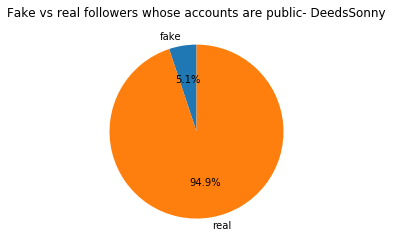

In [31]:

slice_followers_public = [fake_followers_public, genuine_followers_public]

slice_followers_private = [fake_followers_private, genuine_followers_private]
followers = ['fake','real']
f = plt.figure(1)
plt.pie(slice_followers_public, labels= followers, startangle = 90, autopct = '%.1f%%')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.title('Fake vs real followers whose accounts are public- DeedsSonny')
f.show()


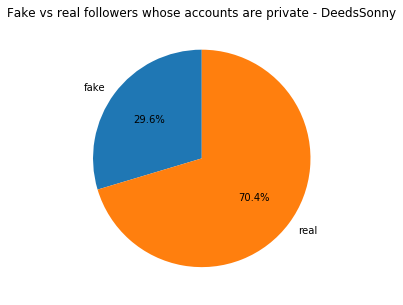

In [33]:

g = plt.figure(2)
plt.pie(slice_followers_private, labels= followers, startangle = 90, autopct = '%.1f%%')
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Fake vs real followers whose accounts are private - DeedsSonny')
g.show()


# Public Fake Follower analysis 

In [34]:
public_fake = data_public.query('predict == "0"')
public_fake = public_fake.astype(int)

In [35]:

#splitting the public dataset into fake and real. analysing the number of zeroes in each column to judge the number of fakes.
#start with fake
has_banner = len(public_fake.query('has_banner == "1"'))
has_location = len(public_fake.query('has_location == "1"'))
has_extended_profile = len(public_fake.query('has_extended_profile == "1"'))
has_url = len(public_fake.query('has_url == "1"'))
average_followers = public_fake['followers'].mean()
average_friends = public_fake['friends'].mean()
average_posts = public_fake['num_posts'].mean()
has_duplicates = len(public_fake.query('has_duplicate > 0'))
has_only_url = len(public_fake.query('onlyHasURL == "1"'))
average_retweets = public_fake['has_retweet'].mean()
average_hashtags = public_fake['contains_hashTag'].mean()

X = [has_banner,
     has_location,
    has_extended_profile,
    has_url,round(average_followers),round(average_friends),
     round(average_posts),has_duplicates,has_only_url,
     round(average_retweets),round(average_hashtags)]

Y = ['Do have banner','Do have location',
     'do have extended profile','Do have URL',
     'avg no. of followers','avg no. of friends','avg no. of posts'
     ,'users who have duplicates','users who have only URL',
     'avg no. of retweets','avg no. of hashtags']

X



[0, 27, 0, 11, 26, 151, 10, 4, 0, 1, 2]

# Public real followers analysis 

In [36]:
public_real = data_public.query('predict == "1"')
public_real = public_real.astype(int)


In [37]:

has_banner = len(public_real.query('has_banner == "1"'))
has_location = len(public_real.query('has_location == "1"'))
has_extended_profile = len(public_real.query('has_extended_profile == "1"'))
has_url = len(public_real.query('has_url == "1"'))
average_followers = public_real['followers'].mean()
average_friends = public_real['friends'].mean()
average_posts = public_real['num_posts'].mean()
has_duplicates = len(public_real.query('has_duplicate > 0'))
has_only_url = len(public_real.query('onlyHasURL == "1"'))
average_retweets = public_real['has_retweet'].mean()
average_hashtags = public_real['contains_hashTag'].mean()

X = [has_banner,
     has_location,
    has_extended_profile,
    has_url,round(average_followers),round(average_friends),
     round(average_posts),has_duplicates,has_only_url,
     round(average_retweets),round(average_hashtags)]

Y = ['Do have banner','Do have location',
     'do have extended profile','Do have URL',
     'avg no. of followers','avg no. of friends','avg no. of posts'
     ,'users who have duplicates','users who have only URL',
     'avg no. of retweets','avg no. of hashtags']


X

[1080, 1124, 591, 592, 522, 655, 141, 187, 0, 480575, 22]

In [ ]:
'''
plt.bar(Y, X)
plt.xlabel('Number of followers', fontsize=15)
plt.ylabel('Various Twitter Features', fontsize=15)
plt.title('Evaluating number of  public followers of Patrick Shyu who are real ', fontsize = 15)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0,1200)
plt.show()
'''

# Private fake followers analysis 

In [38]:
private_fake = data_private.query('predict == "0"')
private_fake = private_fake.astype(int)
private_fake.shape

(2154, 7)

In [39]:
private_fake = data_private.query('predict == "0"')
private_fake = private_fake.astype(int)

has_banner = len(private_fake.query('has_banner == "1"'))
has_location = len(private_fake.query('has_location == "1"'))
has_extended_profile = len(private_fake.query('has_extended_profile == "1"'))
has_url = len(private_fake.query('has_url == "1"'))
average_followers = private_fake['followers'].mean()
average_friends = private_fake['friends'].mean()

X = [has_banner,
     has_location,
    has_extended_profile,
    has_url,round(average_followers),round(average_friends)]

Y = ['Do have banner','Do have location',
     'do have extended profile','Do have URL',
     'avg no. of followers','avg no. of friends']


X

[385, 785, 464, 248, 25, 390]

# Private real followers analysis 

In [40]:
private_real = data_private.query('predict == "1"')
private_real = private_real.astype(int)
print(private_real.shape)

has_banner = len(private_real.query('has_banner == "1"'))
has_location = len(private_real.query('has_location == "1"'))
has_extended_profile = len(private_real.query('has_extended_profile == "1"'))
has_url = len(private_real.query('has_url == "1"'))
average_followers = private_real['followers'].mean()
average_friends = private_real['friends'].mean()

X = [has_banner,
     has_location,
    has_extended_profile,
    has_url,round(average_followers),round(average_friends)]

X





(5116, 7)


[3798, 3608, 2050, 1913, 386, 545]